# To get good quality image from noisy images fi where 1 ≤ i ≤ n.
----
`Roll: CS20B1016, Name: V Nagasai`

----
Let $f$ be an image (Lena). $0\le x \le 255$ $0 \le y \le 255$.
Generate $f_i(x, y) = f(x, y) + η_i(x, y)$ where $η_i(x, y)$ is the Gaussian noise with mean = 0 and variance= 1.
Find $\frac{1}{n}(\sum_{i=1}^nf_i(x,y))$, say it as $g$.
1. Display $f, g$ and $f_1, f_2, ...... f_n$.
2. Do it for $n=5, n=10, n=20$ and $n=30$.

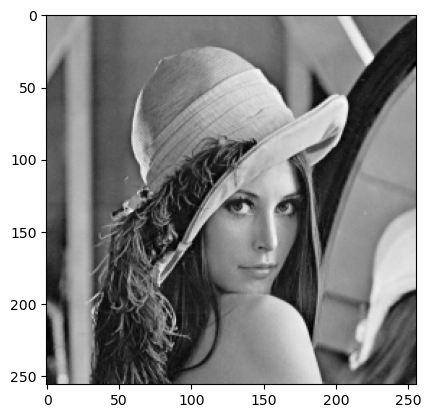

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Reading the image and resizing it to 256x256
img = cv2.imread("Lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img, cmap="gray")
plt.show()

In [24]:
def add_gaussian_noise(img:np.ndarray, mean, standard_deviation):
	height, width = img.shape
	gaussian_dist = np.random.normal(mean, standard_deviation, height*width)
	for i in range(height):
		for j in range(width):
			img[i][j] += gaussian_dist[(i*height)+j]
	return img

In [25]:
def average_N_noisy_images(img, n):
	images = []
	for i in range(n):
		noisy_image = add_gaussian_noise(img, 0, 1)
		images.append(noisy_image)
	avg_image = np.mean(images, axis=0)
	return (np.array(images), avg_image)

In [26]:
def plot_images(images, rows, cols):
	plt.figure(figsize=(2.2*cols, 2.2*rows))
	plt.subplots_adjust(bottom=0.0, left=.01, right=.99, top=.90, hspace=.20)
	for i in range(rows*cols):
		plt.subplot(rows, cols, i+1)
		plt.imshow(images[i], cmap="gray")
		plt.title(f"Image f_{i+1}")
		plt.axis("off")

In [27]:
def quality_from_noise(img, n=5):
	f = img.copy()
	images, g = average_N_noisy_images(f, n)
	plt.subplot(1, 2, 1)
	plt.imshow(img, cmap="gray")
	plt.title(f"Image f")
	plt.axis("off")
	plt.subplot(1, 2, 2)
	plt.imshow(g, cmap="gray")
	plt.title(f"Image g")
	plt.axis("off")
	plot_images(images,n//5,5)

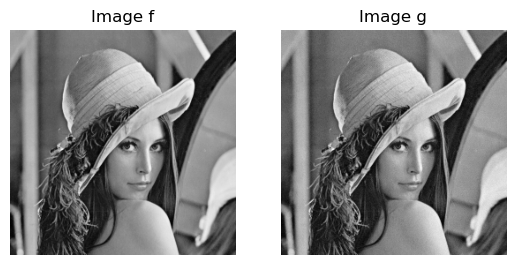

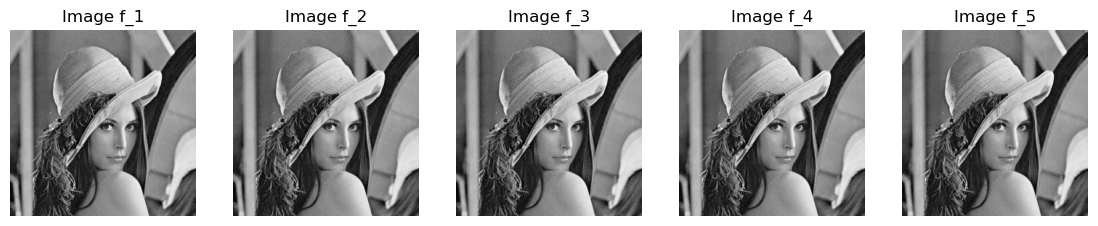

In [28]:
mse = quality_from_noise(img, n=5)

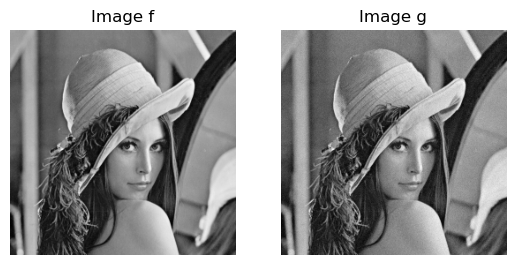

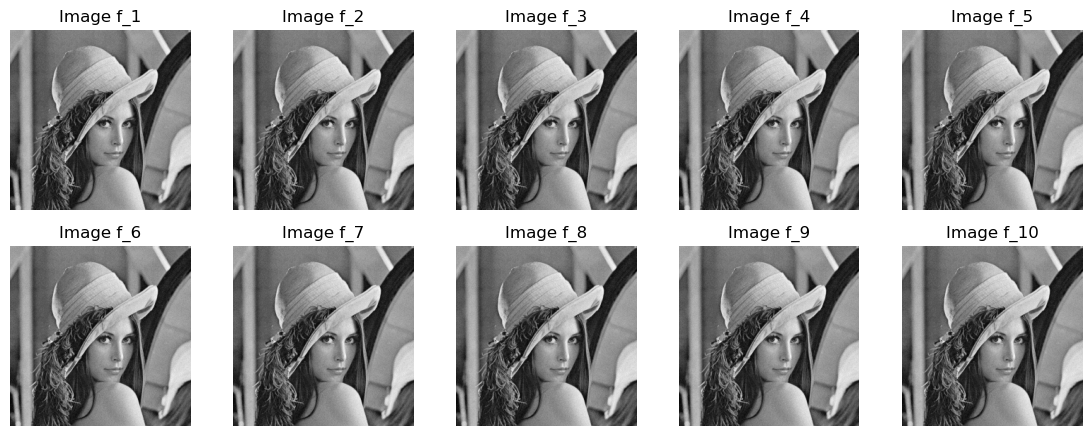

In [29]:
quality_from_noise(img, n=10)

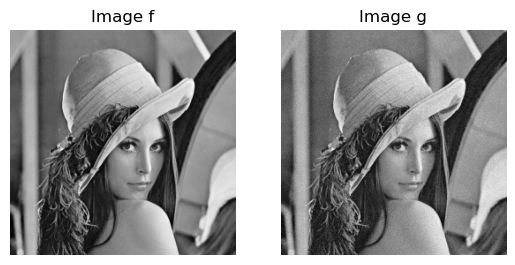

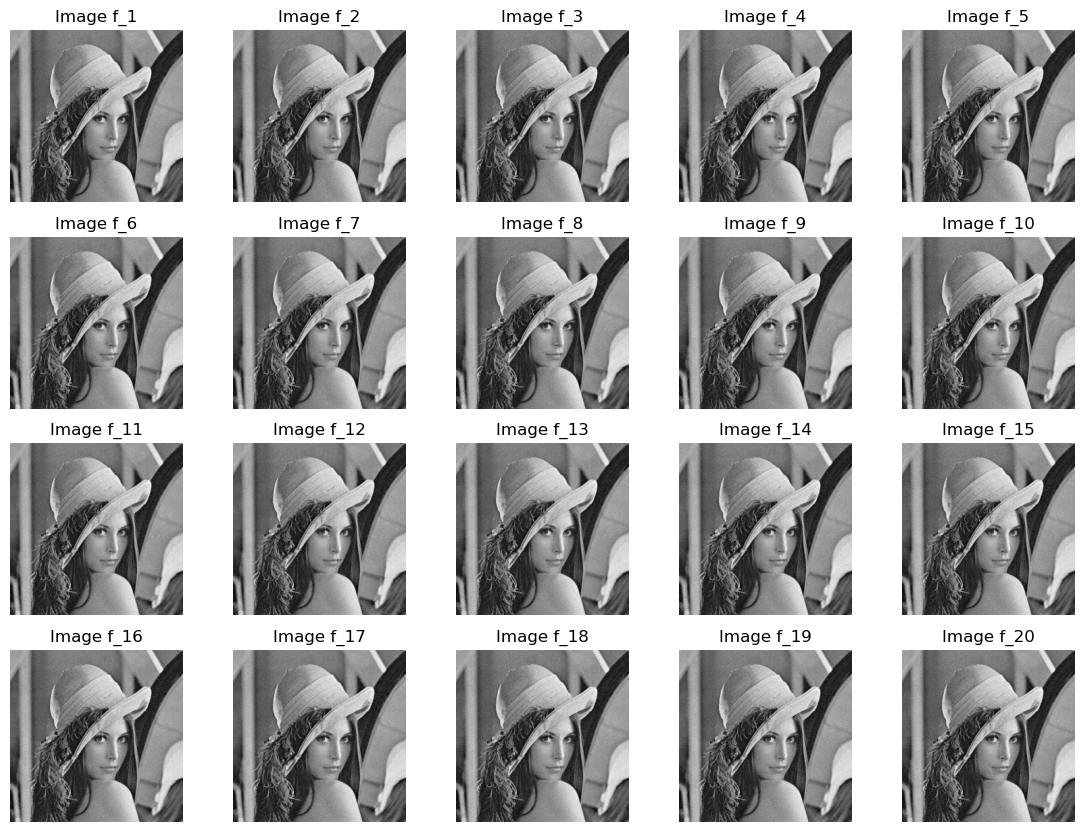

In [30]:
quality_from_noise(img, n=20)

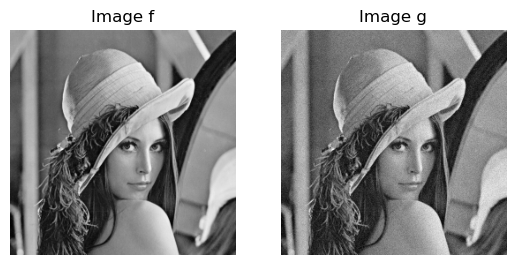

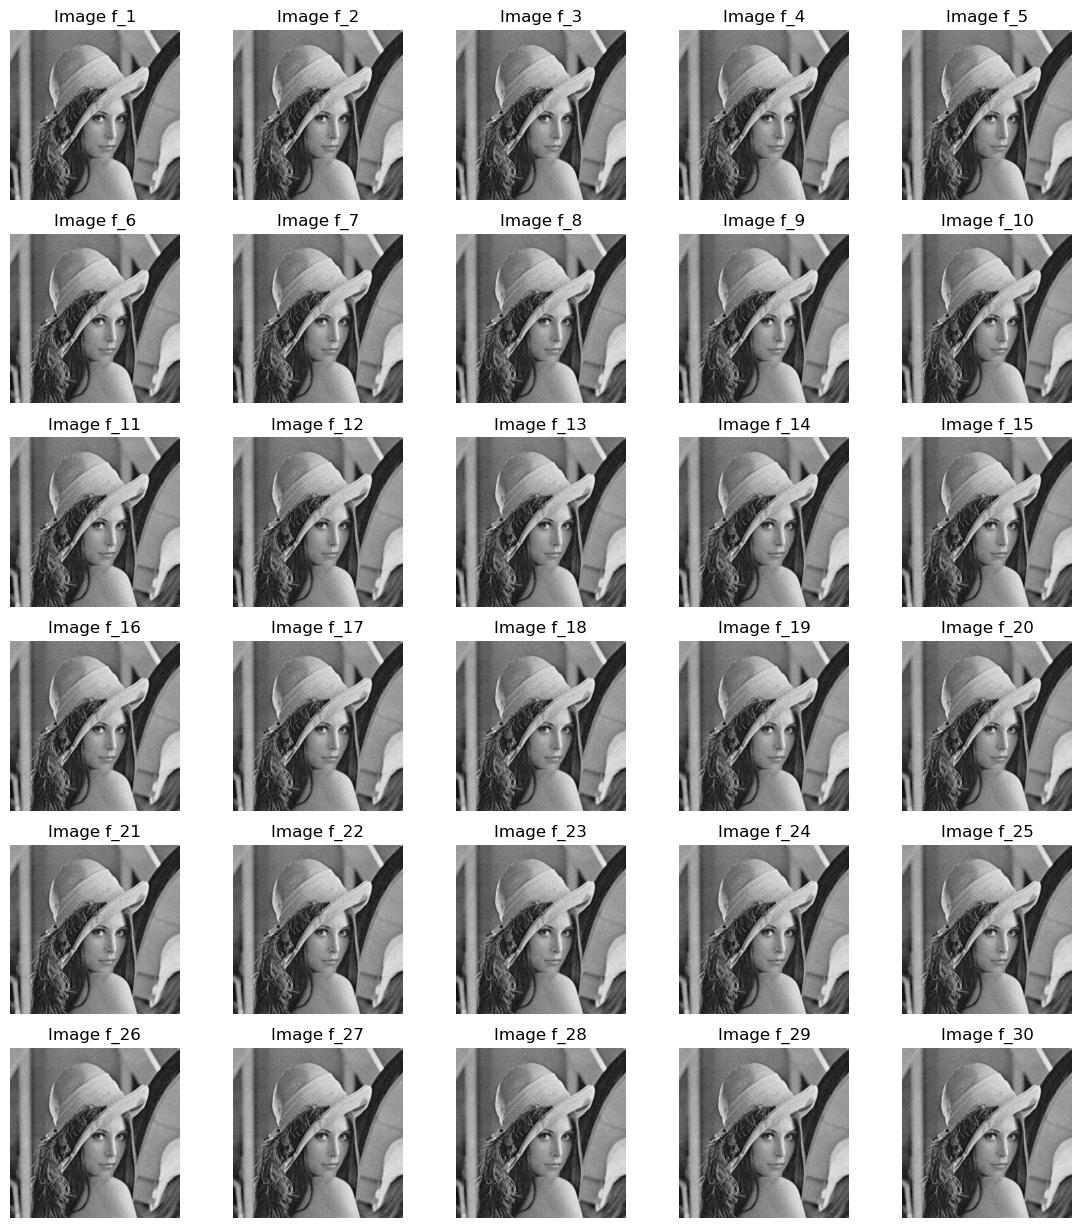

In [31]:
quality_from_noise(img, n=30)